# 天池案例 - 资金流入流出时间序列预测

In [28]:
# 使用前20130701到20130831预测2013年9月份的申购数据
import pandas as pd
import numpy as np
import warnings
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
warnings.filterwarnings("ignore")
from statsmodels.graphics.api import qqplot

In [2]:
cd datalab/13319

/mnt/file/opensearch/documents/13319


In [3]:
ls

comp_predict_table.csv*  mfd_day_share_interest.csv*  user_profile_table.csv*
mfd_bank_shibor.csv*     user_balance_table.csv*


In [29]:
df_user=pd.read_csv("datalab/13319/user_balance_table.csv")
df_user = df_user.groupby(['report_date'])['total_purchase_amt','total_redeem_amt'].sum()
df_user.reset_index(inplace=True)
df_user.head()

,report_date,total_purchase_amt,total_redeem_amt
0,20130701,32488348,5525022
1,20130702,29037390,2554548
2,20130703,27270770,5953867
3,20130704,18321185,6410729
4,20130705,11648749,2763587


In [30]:
import datetime
df_user['report_date']=df_user['report_date'].apply(lambda x:datetime.datetime.strptime(str(x),"%Y%m%d"))
df_user.head()

,report_date,total_purchase_amt,total_redeem_amt
0,2013-07-01,32488348,5525022
1,2013-07-02,29037390,2554548
2,2013-07-03,27270770,5953867
3,2013-07-04,18321185,6410729
4,2013-07-05,11648749,2763587


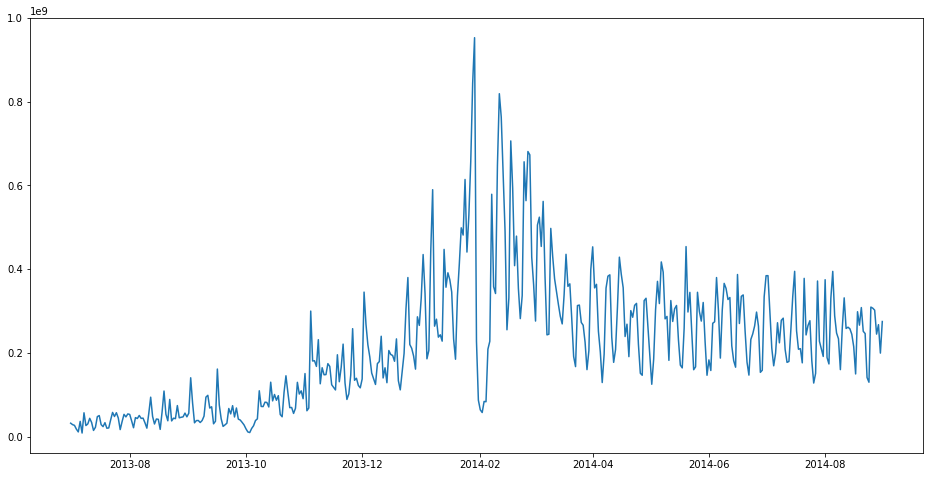

In [31]:
fig=plt.figure(figsize=(16,8))
plt.plot(df_user['report_date'],df_user['total_purchase_amt'])
plt.show()

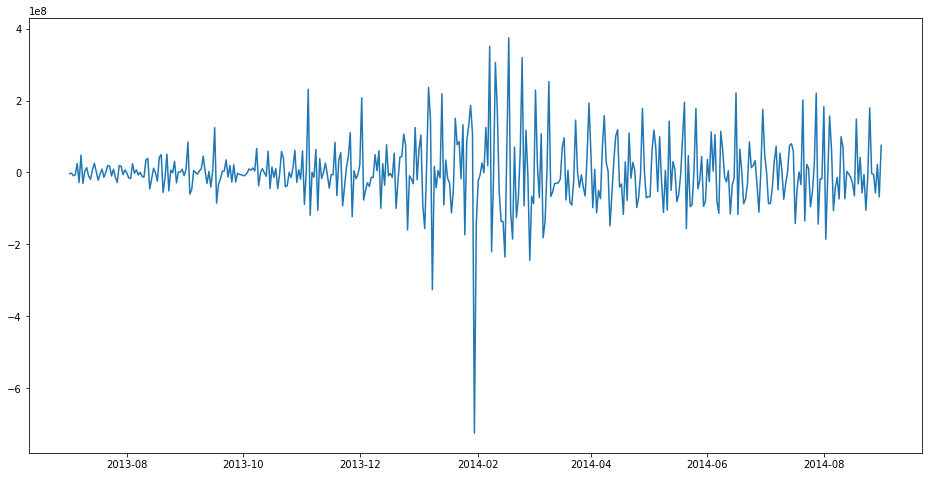

In [6]:
# df_user['total_purchase_amt']=df_user['total_purchase_amt'].diff(1)
fig=plt.figure(figsize=(16,8))
plt.plot(df_user['report_date'],df_user['total_purchase_amt'])
plt.show()

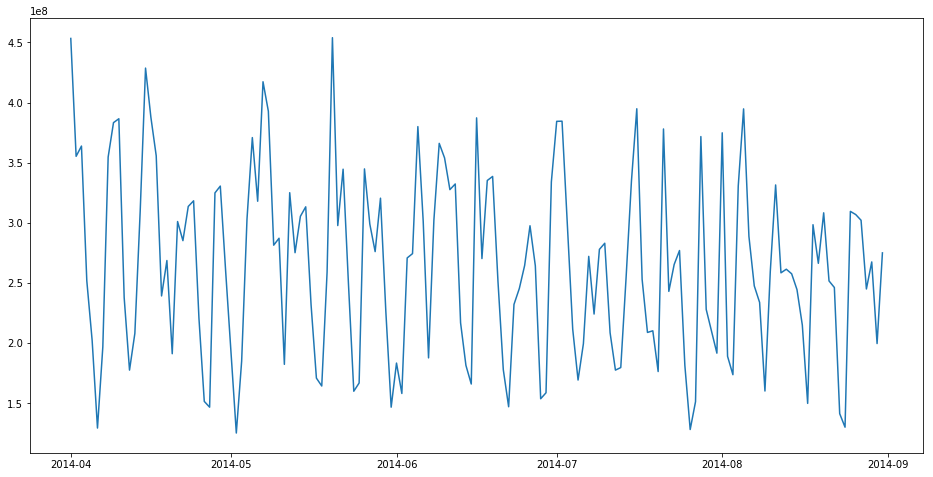

,report_date,total_purchase_amt,total_redeem_amt
274,2014-04-01,453320585,277429358
275,2014-04-02,355347118,272612066
276,2014-04-03,363877120,266605457
277,2014-04-04,251895894,200192637
278,2014-04-05,202336542,163199682


In [32]:
def train(string):
    return datetime.datetime.strptime(string,"%Y%m%d")
df_user=df_user.loc[((df_user['report_date']>=train('20140401'))&(df_user['report_date']<=train('20140831')))]
fig=plt.figure(figsize=(16,8))
plt.plot(df_user['report_date'],df_user['total_purchase_amt'])
plt.show()
df_user.head()

In [33]:
df_p=df_user
# adfuller 平稳性检验
t=adfuller(df_p['total_purchase_amt'])
print(t[1])

0.0341575269692


In [34]:
# 随机性检验
qljungbox, pval, qboxpierce, pvalbp=acorr_ljungbox(df_p['total_purchase_amt'],lags=12,boxpierce=True)
#jungbox检验
print(pval)

#boxpierce检验
print(pvalbp)

[  2.67889405e-06   8.23246698e-06   5.90391674e-10   9.69297264e-13
   1.61052547e-12   1.56379940e-13   1.12639946e-19   5.83328643e-20
   2.77172773e-20   2.16814838e-24   1.79817608e-27   1.90701437e-27]
[  3.34566998e-06   1.03722711e-05   1.05598229e-09   2.34071259e-12
   4.00565007e-12   4.66378146e-13   8.36689986e-19   4.87188537e-19
   2.64492182e-19   4.80720117e-23   8.10376221e-26   9.44627148e-26]


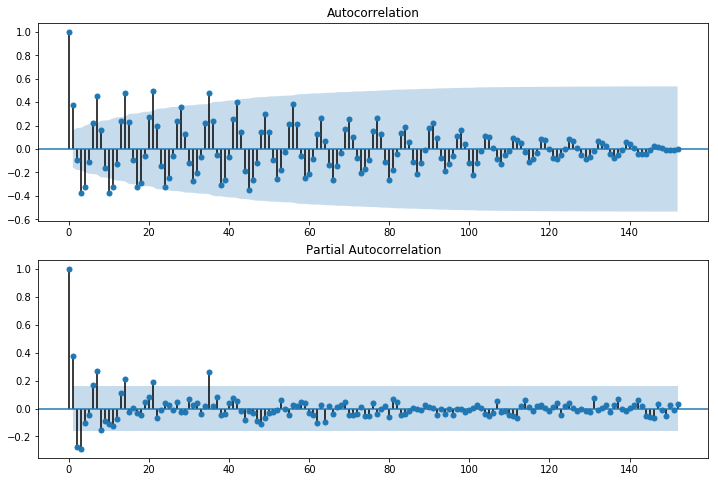

In [36]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_p['total_purchase_amt'],ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_p['total_purchase_amt'],ax=ax2)

In [37]:
# 数据整理
df_p['total_purchase_amt_f']=df_p['total_purchase_amt'].astype(float)
df_p['total_purchase_amt_f'].index=df_p['report_date']
df_p.head()

,report_date,total_purchase_amt,total_redeem_amt,total_purchase_amt_f
274,2014-04-01,453320585,277429358,453320585.0
275,2014-04-02,355347118,272612066,355347118.0
276,2014-04-03,363877120,266605457,363877120.0
277,2014-04-04,251895894,200192637,251895894.0
278,2014-04-05,202336542,163199682,202336542.0


In [40]:
import statsmodels.api as sm
# model= sm.tsa.ARMA(df_p['total_purchase_amt_f'],(1,1)).fit()
# print(model.aic,model.bic,model.hqic)
model=ARIMA(df_p['total_purchase_amt_f'],order=(1,0,2)).fit()
print(model.aic,model.bic,model.hqic)
# model=ARIMA(df_p['total_purchase_amt_f'],order=(1,1,1)).fit()
# print(model.aic,model.bic,model.hqic)
# model3=ARIMA(df_p['total_purchase_amt_f'],order=(3,1,4)).fit()
# print(model3.aic,model3.bic,model3.hqic)
# model4=ARIMA(df_p['total_purchase_amt_f'],order=(3,1,3)).fit()
# print(model4.aic,model4.bic,model4.hqic)
# model5=ARIMA(df_p['total_purchase_amt_f'],order=(4,1,4)).fit()
# print(model5.aic,model5.bic,model5.hqic)
# model6=ARIMA(df_p['total_purchase_amt_f'],order=(7,1,1)).fit()
# print(model6.aic,model6.bic,model6.hqic)

5969.638269156685 5984.79045876 5975.79333958


<Figure size 864x432 with 0 Axes>

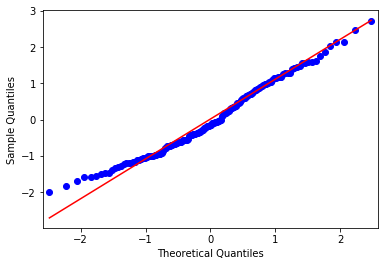

In [41]:
# 并采用QQ-plot分析了拟合效果。看起来残差符合正态分布
resid=model.resid # 残差
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot()
fig=qqplot(resid,line='q',ax=ax,fit=True)


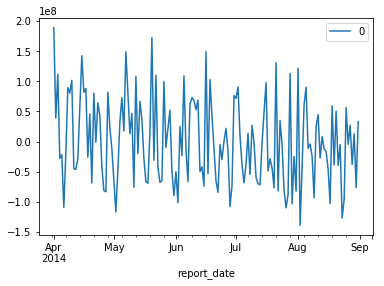

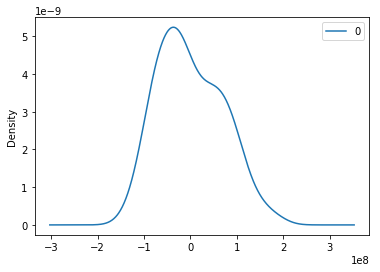

                  0
count  1.530000e+02
mean   3.273873e+05
std    6.992114e+07
min   -1.391938e+08
25%   -5.007516e+07
50%   -1.062719e+07
75%    5.293419e+07
max    1.890039e+08


In [42]:
# 继续对残差检验，观察是否符合正太分布
resid=pd.DataFrame(resid)
resid.plot()
plt.show()
resid.plot(kind='kde')
plt.show()
print(resid.describe())


In [43]:
# 上面观察，残差符合正态分布，再进行Dw检验,当其值为当DW值显著的接近于O或４时，则存在自相关性，而接近于２时，则不存在（一阶）自相关性
print(sm.stats.durbin_watson(resid))

[ 1.80720804]


In [44]:
# 白噪声检查，说明不拒绝原假设，是随机值
qljungbox, pval, qboxpierce, pvalbp=acorr_ljungbox(resid, lags=12,boxpierce=True)
print(pval)
print(pvalbp)

[  3.70415971e-01   3.81513029e-01   5.20052919e-03   4.12073915e-03
   7.53413479e-03   5.18813530e-03   3.81813372e-07   7.66344129e-07
   1.34204879e-06   3.67603247e-08   1.00748512e-08   1.44527951e-08]
[  3.75087464e-01   3.90108303e-01   6.24651552e-03   5.12080604e-03
   9.32326264e-03   6.74174597e-03   9.50725282e-07   1.90022131e-06
   3.33942804e-06   1.31060777e-07   4.28789686e-08   6.30625497e-08]


In [45]:

# 预测9月份数据
predict=model.predict('2014-09-01','2014-09-30',dynamic=True)
print(predict)
submit=pd.DataFrame({"report_date":predict.index,'total_purchase_amt_f':predict.values})
print(submit)
print(type(predict))


2014-09-01    2.884710e+08
2014-09-02    2.690358e+08
2014-09-03    2.676733e+08
2014-09-04    2.667042e+08
2014-09-05    2.660149e+08
2014-09-06    2.655246e+08
2014-09-07    2.651759e+08
2014-09-08    2.649278e+08
2014-09-09    2.647514e+08
2014-09-10    2.646259e+08
2014-09-11    2.645366e+08
2014-09-12    2.644731e+08
2014-09-13    2.644280e+08
2014-09-14    2.643958e+08
2014-09-15    2.643730e+08
2014-09-16    2.643567e+08
2014-09-17    2.643452e+08
2014-09-18    2.643370e+08
2014-09-19    2.643311e+08
2014-09-20    2.643270e+08
2014-09-21    2.643240e+08
2014-09-22    2.643219e+08
2014-09-23    2.643204e+08
2014-09-24    2.643193e+08
2014-09-25    2.643186e+08
2014-09-26    2.643180e+08
2014-09-27    2.643176e+08
2014-09-28    2.643174e+08
2014-09-29    2.643172e+08
2014-09-30    2.643170e+08
Freq: D, dtype: float64
   report_date  total_purchase_amt_f
0   2014-09-01          2.884710e+08
1   2014-09-02          2.690358e+08
2   2014-09-03          2.676733e+08
3   2014-09-04    

In [46]:
df_r=pd.read_csv("datalab/13319/user_balance_table.csv")
df_r = df_r.groupby(['report_date'])['total_purchase_amt','total_redeem_amt'].sum()
df_r.reset_index(inplace=True)
df_r.head()

,report_date,total_purchase_amt,total_redeem_amt
0,20130701,32488348,5525022
1,20130702,29037390,2554548
2,20130703,27270770,5953867
3,20130704,18321185,6410729
4,20130705,11648749,2763587


In [47]:
import datetime
df_r['report_date']=df_r['report_date'].apply(lambda x:datetime.datetime.strptime(str(x),"%Y%m%d"))
# df_r['total_redeem_amt']=df_r['total_redeem_amt'].diff(1)
def train(string):
    return datetime.datetime.strptime(string,"%Y%m%d")
df_r=df_user.loc[((df_r['report_date']>=train('20140401'))&(df_r['report_date']<=train('20140831')))]
df_r.head()

,report_date,total_purchase_amt,total_redeem_amt,total_purchase_amt_f
274,2014-04-01,453320585,277429358,453320585.0
275,2014-04-02,355347118,272612066,355347118.0
276,2014-04-03,363877120,266605457,363877120.0
277,2014-04-04,251895894,200192637,251895894.0
278,2014-04-05,202336542,163199682,202336542.0


In [48]:
def train(string):
    return datetime.datetime.strptime(string,"%Y%m%d")
df_r=df_r.loc[((df_r['report_date']>=train('20140401'))&(df_r['report_date']<=train('20140831')))]
# 回购数据
# 数据整理
df_r['total_redeem_amt_f']=df_p['total_redeem_amt'].astype(float)
df_r['total_redeem_amt_f'].index=df_p['report_date']
df_r.head()

,report_date,total_purchase_amt,total_redeem_amt,total_purchase_amt_f,total_redeem_amt_f
274,2014-04-01,453320585,277429358,453320585.0,277429358.0
275,2014-04-02,355347118,272612066,355347118.0,272612066.0
276,2014-04-03,363877120,266605457,363877120.0,266605457.0
277,2014-04-04,251895894,200192637,251895894.0,200192637.0
278,2014-04-05,202336542,163199682,202336542.0,163199682.0


In [53]:
model=ARIMA(df_r['total_redeem_amt_f'],order=(1,0,3)).fit()
print(model.aic,model.bic,model.hqic)

6004.67481800969 6022.85744554 6012.06090252


In [54]:
predict1=model.predict('2014-09-01','2014-09-30',dynamic=True)
submit['redeem']=predict1.values
print(predict1.values)
submit.head()
print(submit)

[  2.78805579e+08   2.75014160e+08   2.62446845e+08   2.66825029e+08
   2.66355223e+08   2.66405636e+08   2.66400226e+08   2.66400807e+08
   2.66400744e+08   2.66400751e+08   2.66400750e+08   2.66400751e+08
   2.66400751e+08   2.66400751e+08   2.66400751e+08   2.66400751e+08
   2.66400751e+08   2.66400751e+08   2.66400751e+08   2.66400751e+08
   2.66400751e+08   2.66400751e+08   2.66400751e+08   2.66400751e+08
   2.66400751e+08   2.66400751e+08   2.66400751e+08   2.66400751e+08
   2.66400751e+08   2.66400751e+08]
   report_date  total_purchase_amt_f        redeem
0   2014-09-01          2.884710e+08  2.788056e+08
1   2014-09-02          2.690358e+08  2.750142e+08
2   2014-09-03          2.676733e+08  2.624468e+08
3   2014-09-04          2.667042e+08  2.668250e+08
4   2014-09-05          2.660149e+08  2.663552e+08
5   2014-09-06          2.655246e+08  2.664056e+08
6   2014-09-07          2.651759e+08  2.664002e+08
7   2014-09-08          2.649278e+08  2.664008e+08
8   2014-09-09        

In [20]:
!ls /home/myspace/

1095279384866


In [56]:

columns = ['report_date','total_purchase_amt_f','redeem']
submit.to_csv("/home/myspace/1095279384866/submit01.csv",index=None,header=None,columns=columns)



In [57]:
submit

,report_date,total_purchase_amt_f,redeem
0,2014-09-01,2.884710e+08,2.788056e+08
1,2014-09-02,2.690358e+08,2.750142e+08
2,2014-09-03,2.676733e+08,2.624468e+08
3,2014-09-04,2.667042e+08,2.668250e+08
4,2014-09-05,2.660149e+08,2.663552e+08
5,2014-09-06,2.655246e+08,2.664056e+08
6,2014-09-07,2.651759e+08,2.664002e+08
7,2014-09-08,2.649278e+08,2.664008e+08
8,2014-09-09,2.647514e+08,2.664007e+08
9,2014-09-10,2.646259e+08,2.664008e+08
